In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

## Данные из интернета

In [3]:
df = pd.read_csv("LR_data.csv")

X = df[["Temperature"]]
y = df["Pressure"]

### Парная линейная регрессия (where there is only 1 feature)

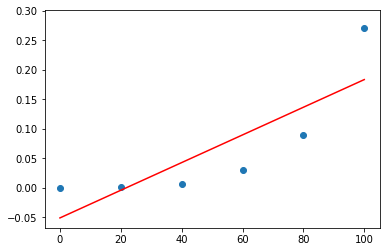

In [36]:
reg = LinearRegression().fit(X, y)

y_pred = reg.predict(np.array(X))
plt.scatter(X, y)
plt.plot(X, y_pred, "red")
plt.show()

### Полиномиальная регрессия
Мы видим, что парная линейная регрессия, предствляющая собой прямую, не отражает тенденцию зависимости отклика от фичи должным образом. Попробуем увеличить степень нашей регресии, используя полиномиальную регрессию.

In [3]:
def create_polynom(feature, degree):
    """ Returns changed array of the feature according
    to the degree of the regression polynomial """
    
    return np.array([feature**i for i in range(1, degree+1)]).T

Реализация "своими руками"

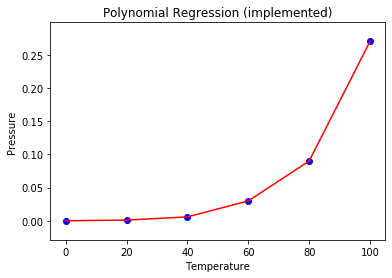

1.2582136726266962e-20

In [6]:
X = df[["Temperature"]]
y = df["Pressure"]
plt.scatter(X, y, color = 'blue')

X = create_polynom(df["Temperature"], degree=5)
reg = LinearRegression().fit(X, y)
y_pred = reg.predict(X)

plt.plot(df.Temperature, y_pred, "red")
plt.title('Polynomial Regression (implemented)')
plt.xlabel('Temperature')
plt.ylabel('Pressure')

plt.show()

mean_squared_error(y, y_pred)
# (reg.coef_, reg.intercept_) # not changing despite a new launch, but changes with another degree

Использование готового модуля PolynomialFeatures

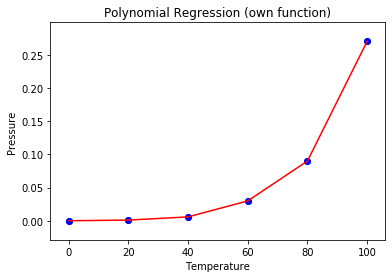

6.913810950560085e-20

In [6]:
X = df[["Temperature"]]
y = df["Pressure"]
plt.scatter(X, y)

poly = PolynomialFeatures(degree=5)
X_poly = poly.fit_transform(X)
lin2 = LinearRegression().fit(X_poly, y)

plt.scatter(X, y, color = 'blue')
plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'red')
plt.title('Polynomial Regression (own function)')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
 
plt.show()
mean_squared_error(y, lin2.predict(poly.fit_transform(X)))

Видно, что моя пашет лучше, так как по моему методу ошибка меньше.

## Данные из SKILLBOX

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso

In [22]:
data = pd.read_csv('non_linear.csv')

In [27]:
degrees = [5, 10, 15]
for i in degrees:
    X = create_polynom(data['x_train'], i)
    y = data.y_train.values
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)
    model = Ridge(alpha=0).fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    y_pred_train = model.predict(X_train)
    print(f"Degree = {i}")
    print(f"Quality on training:{round(r2_score(y_train, y_pred_train), 4)}")
    print(f"Quality on validation:{round(r2_score(y_valid, y_pred), 4)}\n\n")

Degree = 5
Quality on training:0.8866
Quality on validation:0.9153


Degree = 10
Quality on training:0.9152
Quality on validation:0.8354


Degree = 15
Quality on training:0.9247
Quality on validation:0.6071




C:\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.72884e-22): result may not be accurate.
  overwrite_a=True).T


Видим, что при увеличении степени полинома регрессии точность при обучении растет, однако падает при валидации. Это явный признак переобучения.

In [4]:
from numpy.linalg import inv

С помощью встроенного метода

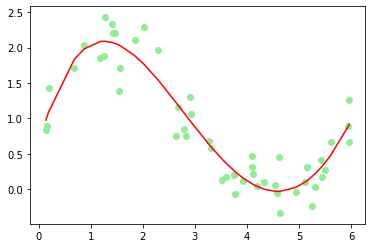

0.06670051280821702

In [131]:
X = data[["x_train"]]
y = data["y_train"]

degree = 4
X = create_polynom(data['x_train'], degree)
reg = LinearRegression().fit(X, y)
y_pred = reg.predict(X)

plt.scatter(data['x_train'], y, color='lightgreen')
plt.plot(data['x_train'], y_pred, c='red')
plt.show()

mean_squared_error(y, y_pred)

Realization of the Ridge regression (L2 regularization) which decreases errors.

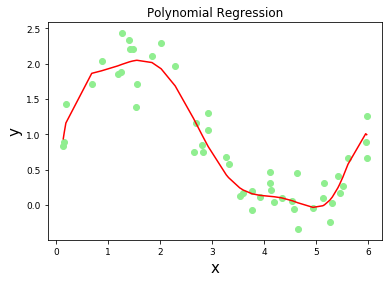

MSE:0.0592.


In [165]:
X = data[["x_train"]]
y = data["y_train"]
degree = 11

X = create_polynom(data['x_train'], degree)

w = inv((X.T).dot(X)).dot(X.T).dot(y)   # usual method
# w = inv((X.T).dot(X) + 0.1*np.eye(degree,degree)).dot(X.T).dot(y)  # with L1-reg

Y = X.dot(w)

plt.scatter(data['x_train'], y, color='lightgreen')
plt.plot(data['x_train'], Y, c='red')
plt.title('Polynomial Regression')
plt.xlabel('x', size=15)
plt.ylabel('y', size=15)
plt.tick_params(labelsize=9)

plt.show()
print(f"MSE:{round(mean_squared_error(y, Y), 4)}.")

We see that the less the degree is, the fewer errors are. But only until we reach a certain degree after which our inaccuracy will only increase.
And as we see, after this degree (**onwards from 12**) errors are less when we use the Risge regression.
By the way, I've selected the value of the regularization coefficient 0.1 randomly.